<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/LeNet_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition.


<a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf" target="_blank">Paper: <u>Gradient-Based Learning Applied to Document Recognition</u></a>

**Authors**: Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner

**Published in**: Proceedings of the IEEE (1998)




## Architecture Diagram


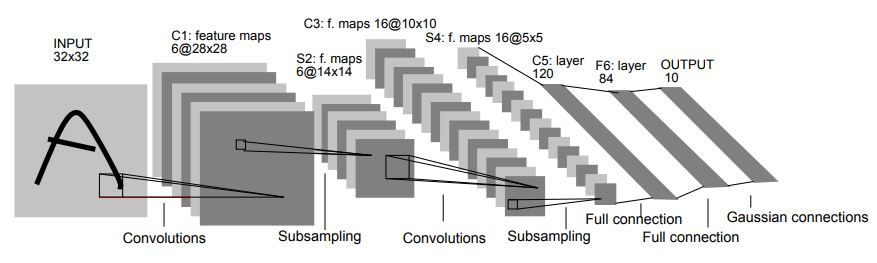

In [0]:
import tensorflow as tf

class LeNet(tf.keras.Model):
  def __init__(self, act_fun = 'tanh'):
    super(LeNet,self).__init__()
    self.inp = tf.keras.Input(shape=(32,32,3))
    self.conv1 = tf.keras.layers.Conv2D(6,kernel_size = (5,5),activation=act_fun)
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.conv2 = tf.keras.layers.Conv2D(filters = 16, kernel_size=(5,5),activation=act_fun)
    self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.flat   = tf.keras.layers.Flatten()
    self.d1    = tf.keras.layers.Dense(120,activation=act_fun)
    self.d2    = tf.keras.layers.Dense(84,activation=act_fun) 
    self.pred  = tf.keras.layers.Dense(10,activation='softmax')

  def call(self,inp):
    x = self.conv1(inp)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.flat(x)
    x = self.d1(x)
    x = self.d2(x)
    
    return self.pred(x)

lenet = LeNet(act_fun='relu')

In [2]:
import keras
from keras.datasets import cifar10,mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape,y_train.shape)
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [3]:
batch_size = 64
steps_per_epoch = len(x_train)//batch_size
print(steps_per_epoch)
lenet.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics = ['accuracy'])

781


In [0]:
lenet.fit(x_train, y_train, batch_size=batch_size, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
782/782 [==============================] - 41s 53ms/step - loss: 0.0731 - accuracy: 0.3956 - val_loss: 0.0659 - val_accuracy: 0.4768
Epoch 2/100
782/782 [==============================] - 41s 53ms/step - loss: 0.0631 - accuracy: 0.5048 - val_loss: 0.0609 - val_accuracy: 0.5275
Epoch 3/100
782/782 [==============================] - 41s 53ms/step - loss: 0.0586 - accuracy: 0.5487 - val_loss: 0.0593 - val_accuracy: 0.5365
Epoch 4/100
782/782 [==============================] - 41s 53ms/step - loss: 0.0559 - accuracy: 0.5743 - val_loss: 0.0561 - val_accuracy: 0.5701
Epoch 5/100
782/782 [==============================] - 41s 53ms/step - loss: 0.0537 - accuracy: 0.5947 - val_loss: 0.0546 - val_accuracy: 0.5870
Epoch 6/100
782/782 [==============================] - 41s 53ms/step - loss: 0.0514 - accuracy: 0.6127 - val_loss: 0.0542 - val_accuracy: 0.5860
Epoch 7/100
782/782 [==============================] - 41s 53ms/step - loss: 0.0498 - accuracy: 0.6289 - val_loss: 0.0533 - val_ac